In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../input/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

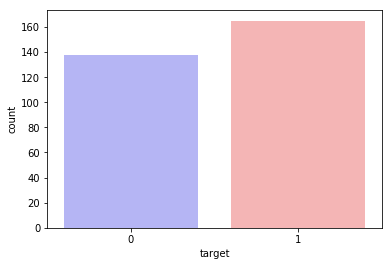

In [4]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

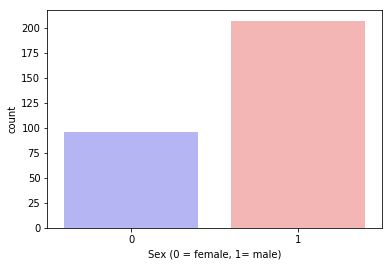

In [5]:
sns.countplot(x='sex', data=df, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


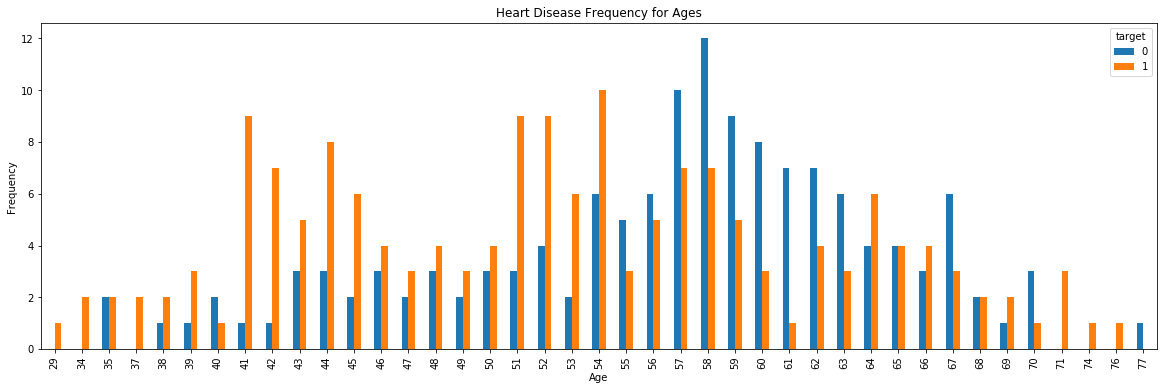

In [7]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

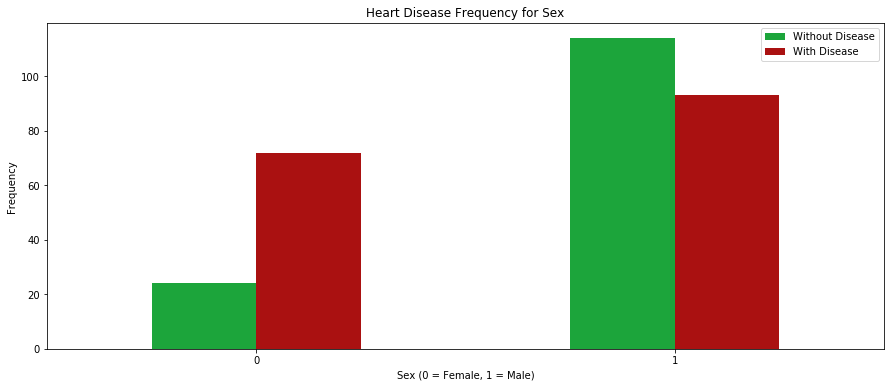

In [8]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Without Disease", "With Disease"])
plt.ylabel('Frequency')
plt.show()

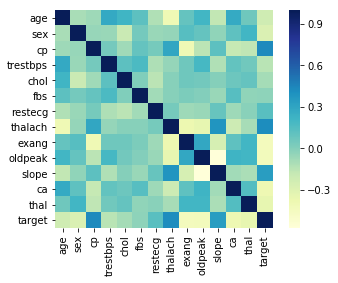

In [9]:
corr = df.corr()
sns.heatmap(corr,  cmap="YlGnBu", square=True);

# #creating dummies for categorical data

In [10]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [11]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [13]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
print(acc)

86.88524590163934


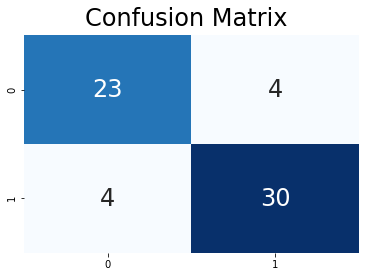

In [15]:
y_head_lr = lr.predict(x_test)
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
plt.suptitle("Confusion Matrix",fontsize=24)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [16]:
max_iter=[100,110,120,130,140]
penalty=['l2']
class_weight=['balanced']
solver=['saga','newton-cg','sag','lbfgs','liblinear']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid=dict(max_iter=max_iter,penalty=penalty,class_weight=class_weight,solver=solver,C=C)

In [17]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced'],
                         'max_iter': [100, 110, 120, 130, 140],
                         'penalty': ['l2'],
                         'solver': ['saga', 'newton-cg', 'sag', 'lbfgs',
                                    'libline

In [18]:
tuned_model=grid.best_estimator_
tuned_model

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
acc = tuned_model.score(x_test,y_test)*100
print('The tuned model accuracy ',acc,'%')

The tuned model accuracy  88.52459016393442 %
